## Projet optimisation

### 1. Optimisation sans contraintes dans le plan



In [8]:
import numpy as np
import matplotlib.pyplot as plt

Question 4

In [9]:
def orientation(P,Q,R):
    """
    1 si sens direct ie det matrice (PQ,PR) strictement positif
    -1 si sens direct ie det matrice strictement neg
    0 si sens direct ie det matrice nul
    """
    PQ = np.array([[P[0]-Q[0]],[P[1]-Q[1]]])
    PR = np.array([[P[0]-R[0]],[P[1]-R[1]]])
    M = np.concatenate((PQ,PR),axis=1)    
    det = np.linalg.det(M)
    if(det>0):
        return 1
    if(det<0):
        return -1
    return 0

In [10]:
#http://math.univ-lyon1.fr/irem/Formation_ISN/formation_recursivite/capes/capes2017Pb2.pdf
def jarvis(E) :
    """
     Fonction qui re¸coit en argument un nuage de points et qui renvoie
     une liste contenant les indices des sommets de l’enveloppe
     convexe de ce nuage
    """
    out = [] #c'est l'enveloppe convexe
    #pour chaque point
    for i in range(len(E)):
        for j in range(i+1,len(E)): #on compare chaque point à ceux d'apres
            sommets_a_tester = []
            
            for k in range(len(E)):
                if k!=i and k!=j : #on a pas le choix, on doit tout comparer entres eux
                    sommets_a_tester.append(orientation(E[i],E[j],E[k]))
            q = sommets_a_tester[0]
            sommet = True
            for v in sommets_a_tester :
                if(v!=q):
                    #print("sommets : ",sommets_a_tester," v = ",v," q = ",q)
                    sommet = False
            if sommet & (i not in out): #not in out pour pas le rajouter
                out.append(i)
            if sommet & (j not in out):
                out.append(j)
    return out

Question 5

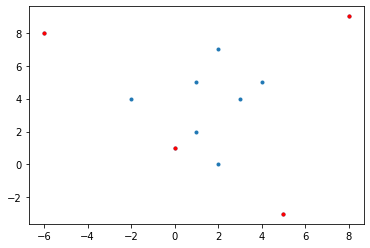

In [11]:
E = np.array([[1,2],[4,5],[8,9],[-6,8],[2,0],[2,7],[3,4],[5,-3],[-2,4],[0,1],[1,5]])
plt.plot(E[:,0],E[:,1],".")
jarvis(E)
plt.plot(E[jarvis(E),0],E[jarvis(E),1],'.r')
#Enveloppe = jarvis(E)
#plt.plot([E[i][0] for i in Enveloppe] ,[E[i][1] for i in Enveloppe],".")

On va choisir le point $\mathcal{A}=(1,5)$

Question 6

Impl´ementer les algorithmes de gradients `a pas fixe, optimal et la g´en´eralisation du gradient
conjugu´e. Indiquer, en justifiant votre choix, quelle approche vous semble la plus performante
(en fonction de la pr´ecision, du temps de calcul, de la stabilit´e...)


In [12]:
def J(x):
    #n = len(x) ?
    out = 0
    for i in range(n):
        out += norm(x - x[i],p)
    return out

def Jprime(x,y):
    return np.array([2*x*eps,2*y/eps])

In [23]:
def J(x):
    print("ce j la")
    return eps*x**2

def Jprime(x):
    return 2*x*eps

In [14]:
#xk+1 = xk − ρ∇~ J(xk).
#https://www.ceremade.dauphine.fr/~gontier/Publications/methodesNumeriques.pdf

def pasFixe(x0,J,K,rho):
    x = np.ones(K)
    x[0] = x0
    for k in range(1,K-1):
        x[k+1] = x[k] - rho * Jprime(x[k])
    return x

def pasOptimal(x0,J,K,rho0):
    x,roh = np.ones(K),np.ones(K)
    x[0] = x0
    rho[0] = rho0
    for k in range(1,K-1):
        f_k = J(x[k] - rho[k] * Jprime(x[k]))
        rho[k+1] = np.argmin(f_k)
        x[k+1] = x[k] - rho[k+1] * Jprime(x[k])
    return x, rho[1:,]


Pas fixe, cas avec J de R dans R

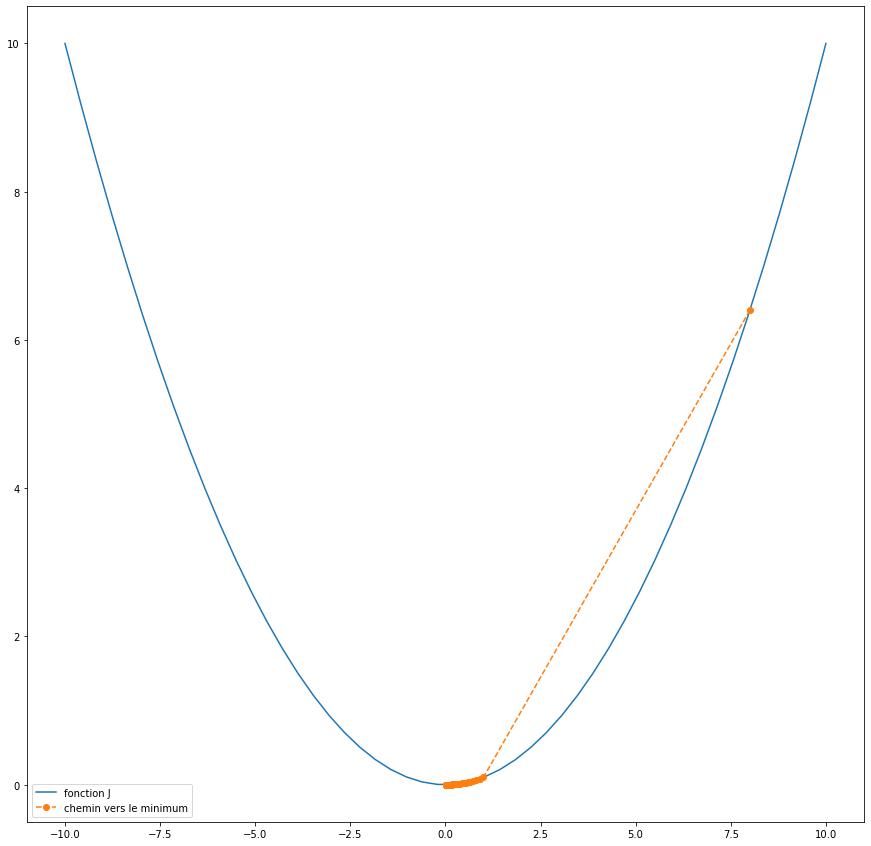

In [15]:
def pasFixe(x0,J,K,rho):
    x = np.ones(K)
    x[0] = x0
    for k in range(1,K-1):
        x[k+1] = x[k] - rho * Jprime(x[k])
    return x

eps = 10e-2
x0 = 8 #np.array([5,7])
K = 50
n = 100
rho = 0.5

X1 = pasFixe(x0,J,K,rho)
x = np.linspace(-10,10,K)

plt.figure(1,(15,15))

plt.plot(x,J(x), label="fonction J")
plt.plot(X1, J(X1), "--o", label=f"chemin vers le minimum")

plt.legend()

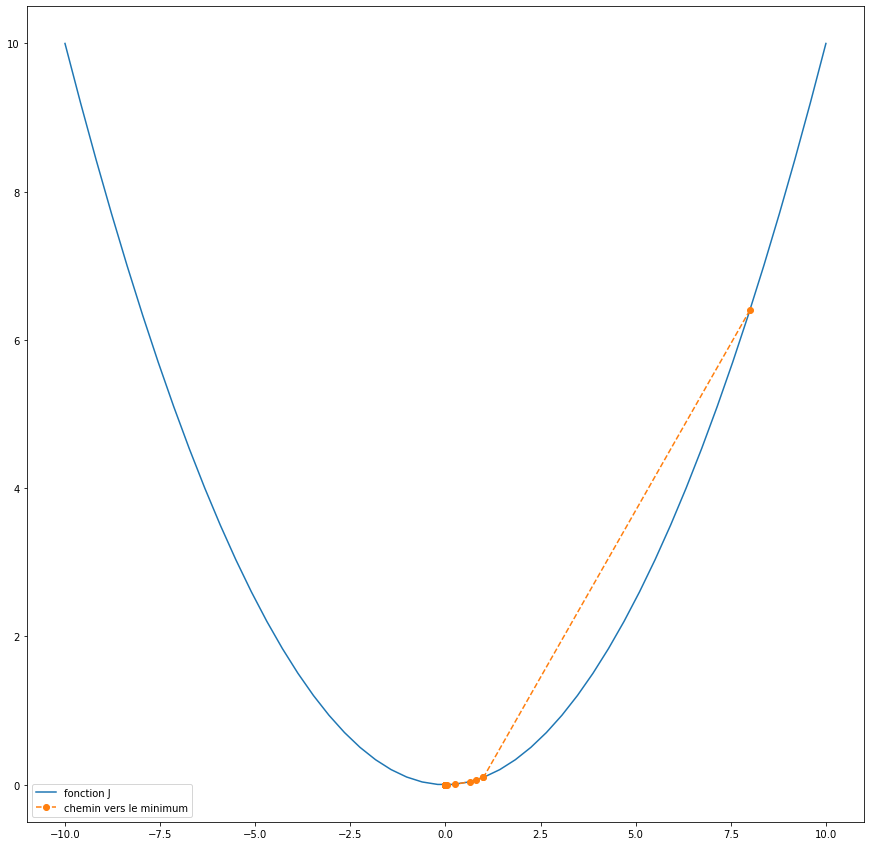

In [16]:
def pasOptimal(x0,J,K,rho0):
    x = np.ones(K)
    x[0] = x0
    rho = rho0
    for k in range(1,K-1):
        f_k = J(x[:k] - rho * Jprime(x[:k]))
        rho = np.argmin(f_k)
        #print("f_k :",f_k, "rho :",rho)
        x[k+1] = x[k] - rho * Jprime(x[k])
    return x

eps = 10e-2
x0 = 8
K = 50
n = 100
rho0 = 0.1

X = pasOptimal(x0,J,K,rho0)
x = np.linspace(-10,10,K)

plt.figure(1,(15,15))

plt.plot(x,J(x), label="fonction J")
plt.plot(X, J(X), "--o", label=f"chemin vers le minimum")

plt.legend()

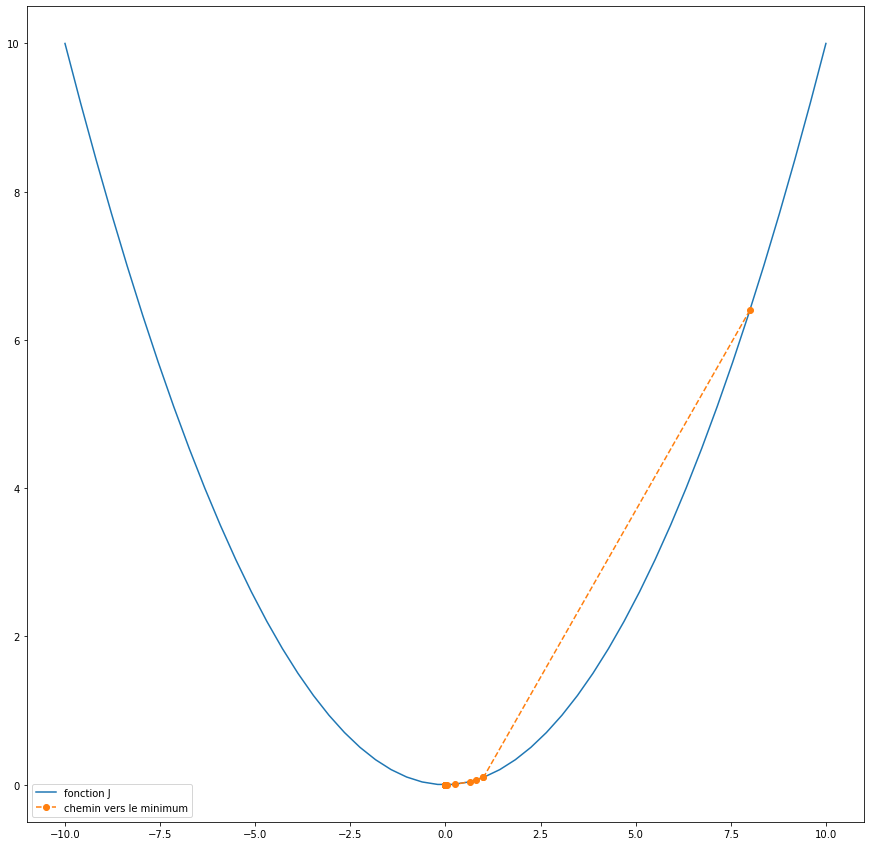

In [17]:
def gradientConjugue(x0,J,K,rho0):
    x = np.ones(K)
    x[0] = x0
    rho = rho0
    d = Jprime(x0)
    
    for k in range(1,K-1):
        if np.linalg.norm(Jprime(x[k-1])) == 0:
            ln = np.inf
        else :
            ln = np.linalg.norm(Jprime(x[k-1]))**2
        d = Jprime(x[k]) + Jprime(x[k])*(Jprime(x[k] - Jprime(x[k-1])))*d / ln
        f_k = J(x[:k] - rho * d)
        rho = np.argmin(f_k)
        #print("f_k :",f_k, "rho :",rho)
        x[k+1] = x[k] - rho * Jprime(x[k])
    return x

eps = 10e-2
x0 = 8
K = 50
n = 100
rho0 = 0.1

Y = gradientConjugue(x0,J,K,rho0)
x = np.linspace(-10,10,K)

plt.figure(1,(15,15))

plt.plot(x,J(x), label="fonction J")
plt.plot(Y, J(Y), "--o", label=f"chemin vers le minimum")

plt.legend()

On va tester les temps que prennent les fonctions à s'exécuter

In [20]:
import timeit

timeit.timeit()
gradientConjugue(x0,J,K,rho0)
timeXconj = timeit.timeit()

timeit.timeit()
pasFixe(x0,J,K,rho0)
timeXpasFixe = timeit.timeit()

timeit.timeit()
pasOptimal(x0,J,K,rho0)
timeXpasOp = timeit.timeit()

print(timeXconj,timeXpasFixe,timeXpasOp)

0.006367178983055055 0.006402962026186287 0.006859690009150654


In [21]:
#le plus rapide est :
switch = {0 : "Gradient conjugué", 1: "pas fixe", 2: "pas optimal"}

idx = np.argmin([timeXconj,timeXpasFixe,timeXpasOp])
print("Le plus rapide est l'algorithme du",switch[idx])

Le plus rapide est l'algorithme du Gradient conjugué


Manuellement on trouve que le minimum de cette fonction est 0. On va chercher quel algorithme atteint cette valeur en premier


In [70]:
Xconj = gradientConjugue(x0,J,K,rho0)
XpasFixe = pasFixe(x0,J,K,rho0)
XpasOp = pasOptimal(x0,J,K,rho0)
i = 0

while(True):
    conj = Xconj[i] == 0
    fixe = XpasFixe[i] == 0
    op = XpasOp[i] == 0
    
    if(conj or fixe or op):
        print(f"i = {i} \n Gradient conjugué : {Xconj[i]} \n Pas fixe : {XpasFixe[i]} \n Pas optimal : {XpasOp[i]}")
        break;
    
    i+=1

i = 7 
 Gradient conjugué : 0.0 
 Pas fixe : 0.885842380864 
 Pas optimal : 0.0


On choisit l'algorithme du pas optimal

### 2. Projections et mise en oeuvre pratique
On considère un ensemble de villes sur la planète qui seront repérées par leur latitude et longitude. Dans
un premier temps : `Alger, Antananarivo, Atlanta, Cape Town, Dakkar, Irkoutsk, Le Caire, Libreville, Moscou, Nairobi, New Dehli, Paris, P´ekin, Quito, Rome, Seattle, Sidney, Stockholm, Tokyo`.
1. Se ramener a une optimisation dans le plan a l’aide du systeme de projection choisi.
2. Modifier le probleme d’optimisation precedent de sorte a tenir de la déformation des géodésiques de la sphere par la projection.
3. Les optimaux obtenus sont ils tres diff´erents suivant ces deux m´ethodes.


In [2]:
villes = np.array(["Alger", "Antananarivo", "Atlanta", "Cape Town", 
                   "Dakkar", "Irkoutsk", "Le Caire", "Libreville", 
                   "Moscou", "Nairobi", "New Dehli", "Paris", "Pekin", 
                   "Quito", "Rome", "Seattle", "Sidney", "Stockholm", 
                   "Tokyo"])

In [3]:
villes

array(['Alger', 'Antananarivo', 'Atlanta', 'Cape Town', 'Dakkar',
       'Irkoutsk', 'Le Caire', 'Libreville', 'Moscou', 'Nairobi',
       'New Dehli', 'Paris', 'Pekin', 'Quito', 'Rome', 'Seattle',
       'Sidney', 'Stockholm', 'Tokyo'], dtype='<U12')

In [5]:
villes_lat = {
          "Alger": [36.7762,3.05997], 
          "Antananarivo" : [-18.933333,47.516667], 
          "Atlanta" : [33.7489954, -84.3879824], 
          "Cape Town" : [-33.924869,18.424055],  
          "Dakkar" : [14.7645042,-17.3660286], 
          "Irkoutsk" : [52.3167,104.233] , 
          "Le Caire" : [30.044420,31.235712], 
          "Libreville" : [0.390100,9.454400], 
          "Moscou" : [55.757425,37.619183], 
          "Nairobi" : [-1.2920659,36.8219462], 
          "New Dehli" : [28.644800,77.216721], 
          "Paris" : [48.856614,2.3522219], 
          "Pekin" : [39.904211,116.407395], 
          "Quito" : [-0.225219,-78.5248], 
          "Rome" : [41.902784,12.496366], 
          "Seattle" : [47.6062095,-122.3320708], 
          "Sidney" : [-33.8674869,151.2069902], 
          "Stockholm" : [59.3293235,18.0685808], 
          "Tokyo" : [35.6894,139.692]
        }

In [6]:
villes_lat["Alger"]

[36.7762, 3.05997]

### 3. Cas contraint


0.9